<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/Xgbm_Lgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv("/content/Titanic_train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.reset_index(drop=True,inplace=True)

In [ ]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [ ]:
train_data[train_data.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
104,1,2,female,29.00,1,0,26.0000,S
138,0,3,male,21.00,0,0,7.9250,S
170,0,2,male,30.00,0,0,13.0000,S
249,0,3,male,28.00,0,0,7.8958,S
256,0,3,male,22.00,0,0,7.2500,S
275,0,2,male,25.00,0,0,13.0000,S
284,0,3,male,28.00,0,0,9.5000,S
309,1,2,female,36.00,0,0,13.0000,S
334,0,2,male,30.00,0,0,13.0000,S
378,0,2,male,34.00,1,0,21.0000,S


In [ ]:
train_data.drop_duplicates(inplace=True)

In [ ]:
train_data.reset_index(drop=True,inplace=True)

In [ ]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
669,0,2,male,28.0,0,0,10.5000,S
670,0,3,female,39.0,0,5,29.1250,Q
671,1,1,female,19.0,0,0,30.0000,S
672,1,1,male,26.0,0,0,30.0000,C


In [ ]:
train_data.shape

(674, 8)

In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,0.416914,2.225519,29.752849,0.537092,0.455490,35.720580
std,0.493415,0.846039,14.693174,0.947016,0.871511,54.101153
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,16.100000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.584400
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [ ]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
669,0,2,male,28.0,0,0,10.5000,S
670,0,3,female,39.0,0,5,29.1250,Q
671,1,1,female,19.0,0,0,30.0000,S
672,1,1,male,26.0,0,0,30.0000,C


<Axes: >

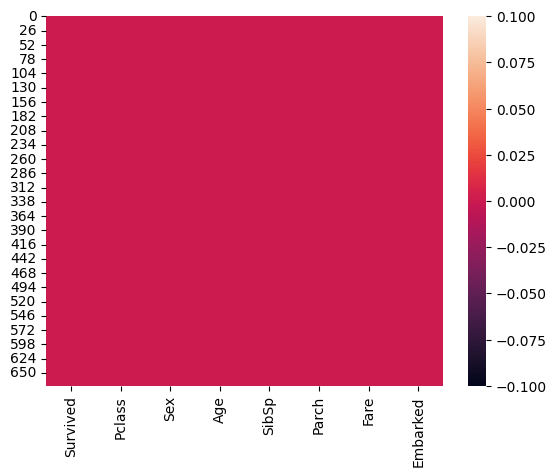

In [ ]:
sns.heatmap(train_data[train_data.columns].isnull())

In [ ]:
train_data=pd.get_dummies(train_data,dtype=int) #encoding

#Treating Outliers

[array([0., 0.]), array([1., 1.])]

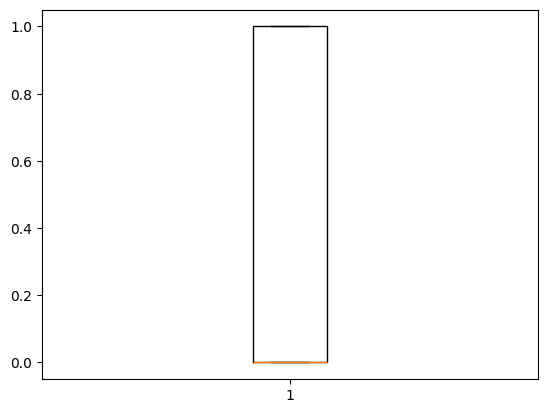

In [ ]:
box_Survived=plt.boxplot(train_data['Survived'])
[item.get_ydata() for item in box_Survived['whiskers']]

[array([1., 1.]), array([3., 3.])]

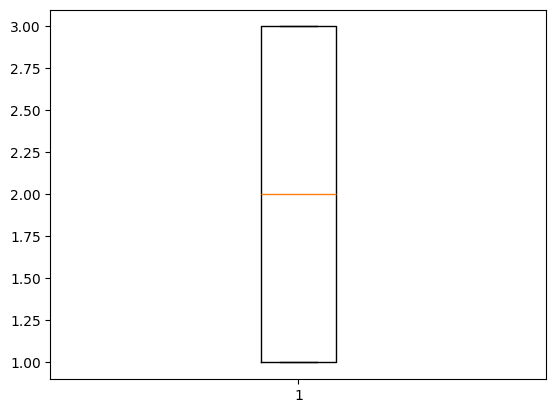

In [ ]:
box_Pclass=plt.boxplot(train_data['Pclass'])
[item.get_ydata() for item in box_Pclass['whiskers']]

[array([20.  ,  0.42]), array([39., 66.])]

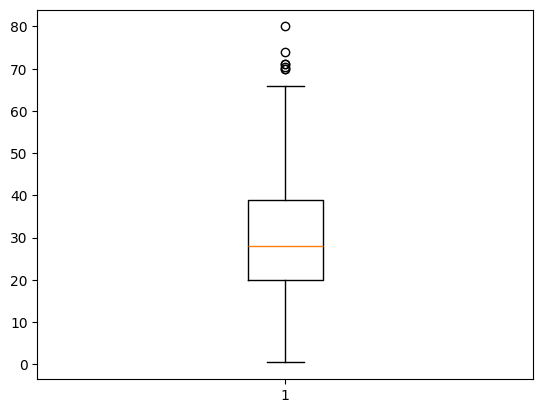

In [ ]:
box_Age=plt.boxplot(train_data['Age'])
[item.get_ydata() for item in box_Age['whiskers']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec3d6bb39d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec3d6bbcd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec3d6bb30d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec3d6bbe150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec3d6bbe8d0>],
 'means': []}

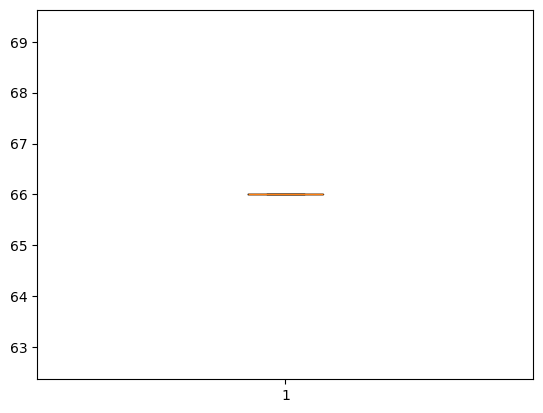

In [ ]:
train_data.loc[(train_data.Age>0.01406799,'Age')]=66.
train_data.loc[(train_data.Age<-0.00018486,'Age')]=0.42
plt.boxplot(train_data['Age'])

[array([0., 0.]), array([1., 2.])]

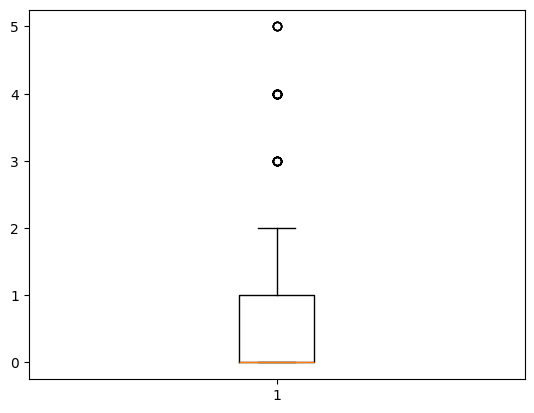

In [ ]:
box_SibSp=plt.boxplot(train_data['SibSp'])
[item.get_ydata() for item in box_SibSp['whiskers']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec3d67676d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec3d6774a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec3d6766d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec3d6775f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec3d6776890>],
 'means': []}

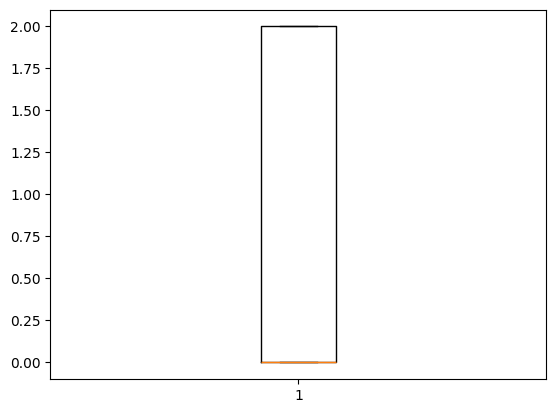

In [ ]:
train_data.loc[(train_data.SibSp>0.01406799,'SibSp')]=2.
train_data.loc[(train_data.SibSp<-0.00018486,'SibSp')]=0.
plt.boxplot(train_data['SibSp'])

[array([0., 0.]), array([1., 2.])]

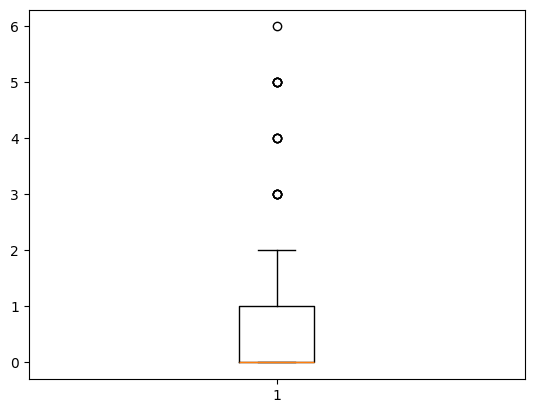

In [ ]:
box_Parch	=plt.boxplot(train_data['Parch'])
[item.get_ydata() for item in box_Parch	['whiskers']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec3d6330150>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec3d63313d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec3d632bcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec3d6332690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec3d6333090>],
 'means': []}

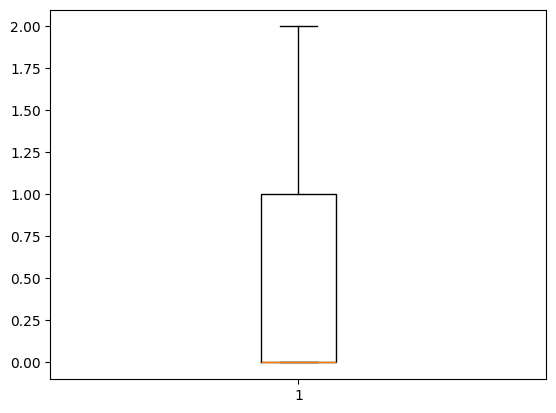

In [ ]:
train_data.loc[(train_data.Parch>2.,'Parch')]=2.
train_data.loc[(train_data.Parch<0.,'Parch')]=0.
plt.boxplot(train_data['Parch'])

[array([8.05, 0.  ]), array([34.5844, 73.5   ])]

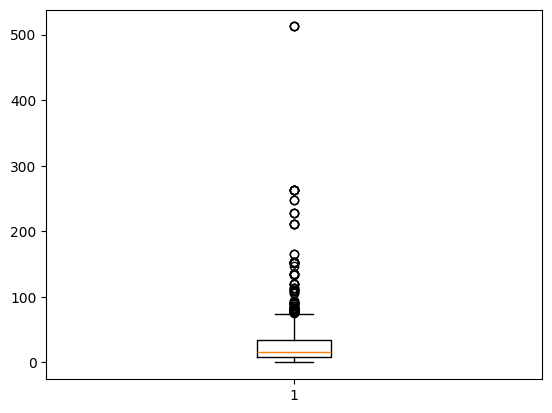

In [ ]:
box_Fare=plt.boxplot(train_data['Fare'])
[item.get_ydata() for item in box_Fare['whiskers']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec3d63ec410>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec3d63ed810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec3d63e7b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec3d63eec50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec3d63ef510>],
 'means': []}

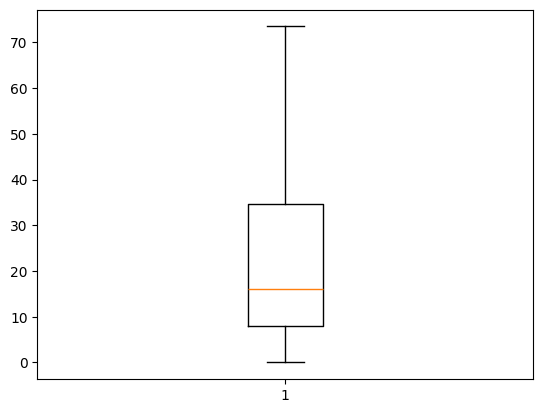

In [ ]:
train_data.loc[(train_data.Fare>73.5,'Fare')]=73.5
train_data.loc[(train_data.Fare<0.,'Fare')]=0.
plt.boxplot(train_data['Fare'])

In [ ]:
train_data.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.353706,NaN,0.081324,0.135063,0.312507,0.519043,-0.519043,0.181328,-0.055400,-0.142421
Pclass,-0.353706,1.000000,NaN,-0.081088,-0.007583,-0.749921,-0.137930,0.137930,-0.276813,0.137954,0.192162
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,0.081324,-0.081088,NaN,1.000000,0.355242,0.345239,0.159404,-0.159404,0.027028,-0.030595,-0.010660
Parch,0.135063,-0.007583,NaN,0.355242,1.000000,0.285962,0.249062,-0.249062,-0.001221,-0.036454,0.018383
Fare,0.312507,-0.749921,NaN,0.345239,0.285962,1.000000,0.219284,-0.219284,0.308617,-0.089365,-0.244728
Sex_female,0.519043,-0.137930,NaN,0.159404,0.249062,0.219284,1.000000,-1.000000,0.085560,0.022874,-0.090391
Sex_male,-0.519043,0.137930,NaN,-0.159404,-0.249062,-0.219284,-1.000000,1.000000,-0.085560,-0.022874,0.090391
Embarked_C,0.181328,-0.276813,NaN,0.027028,-0.001221,0.308617,0.085560,-0.085560,1.000000,-0.100803,-0.882290
Embarked_Q,-0.055400,0.137954,NaN,-0.030595,-0.036454,-0.089365,0.022874,-0.022874,-0.100803,1.000000,-0.379372


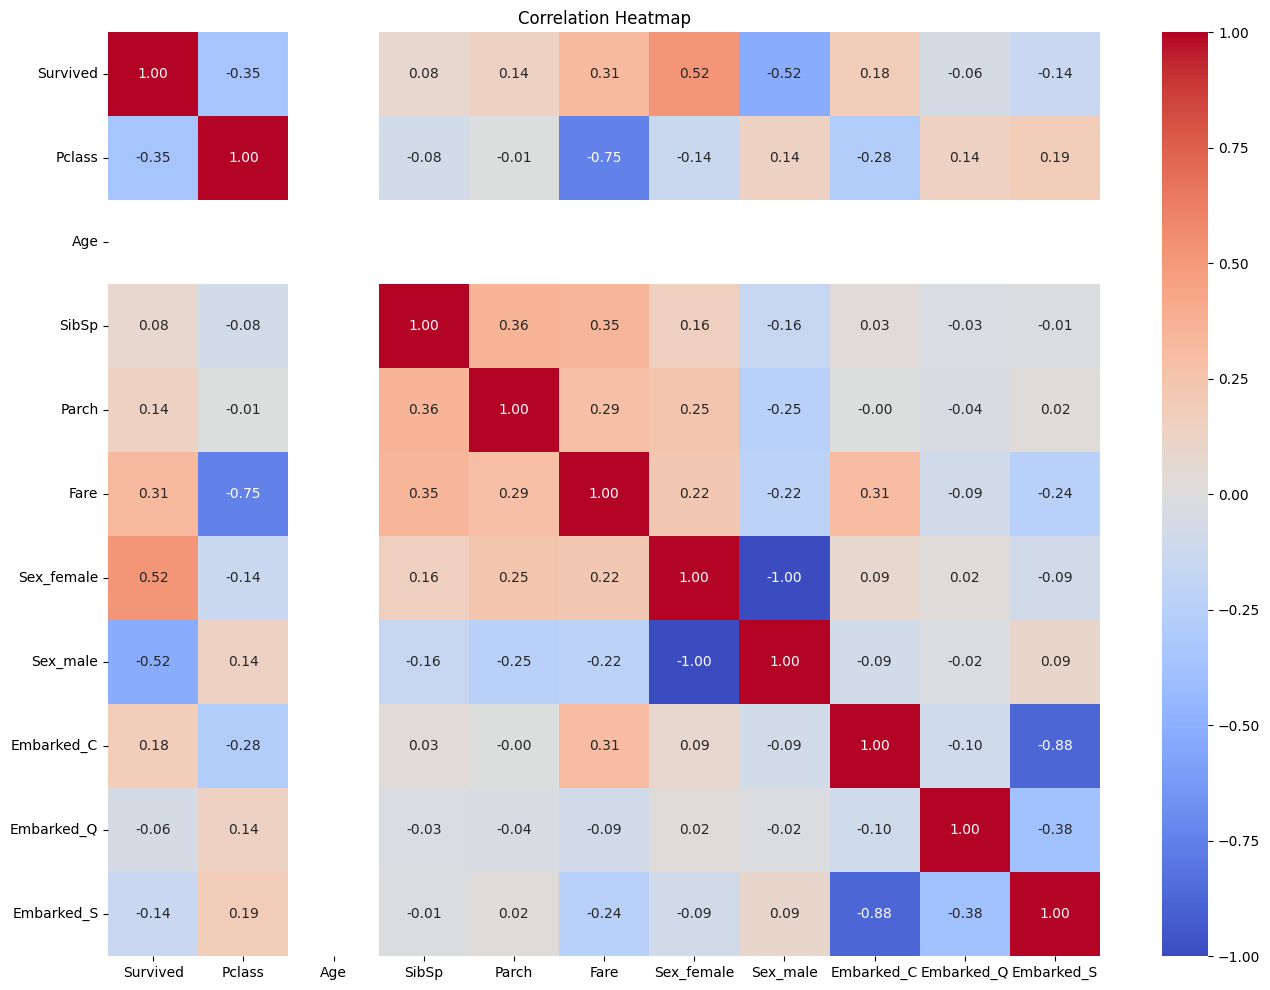

In [ ]:
corr =train_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#XGBM claasifier

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X=train_data.loc[:,'Pclass':'Embarked_S']
Y=train_data.loc[:,'Survived']

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,66.0,2,0,7.2500,0,1,0,0,1
1,1,66.0,2,0,71.2833,1,0,1,0,0
2,3,66.0,0,0,7.9250,1,0,0,0,1
3,1,66.0,2,0,53.1000,1,0,0,0,1
4,3,66.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
669,2,66.0,0,0,10.5000,0,1,0,0,1
670,3,66.0,0,2,29.1250,1,0,0,1,0
671,1,66.0,0,0,30.0000,1,0,0,0,1
672,1,66.0,0,0,30.0000,0,1,1,0,0


In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
669,0
670,0
671,1
672,1


In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.04%


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1])

#**LGBM**

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)



In [ ]:
X=train_data.loc[:,'Pclass':'Embarked_S']
Y=train_data.loc[:,'Survived']


In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,66.0,2,0,7.2500,0,1,0,0,1
1,1,66.0,2,0,71.2833,1,0,1,0,0
2,3,66.0,0,0,7.9250,1,0,0,0,1
3,1,66.0,2,0,53.1000,1,0,0,0,1
4,3,66.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
669,2,66.0,0,0,10.5000,0,1,0,0,1
670,3,66.0,0,2,29.1250,1,0,0,1,0
671,1,66.0,0,0,30.0000,1,0,0,0,1
672,1,66.0,0,0,30.0000,0,1,1,0,0


In [ ]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
669,0
670,0
671,1
672,1


In [ ]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [ ]:
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 233, number of negative: 306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 99
[LightGBM] [Info] Number of data points in the train set: 539, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432282 -> initscore=-0.272547
[LightGBM] [Info] Start training from score -0.272547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
#Prediction
y_pred_L=clf.predict(X_test)

In [ ]:
predictions_L = [round(value) for value in y_pred_L]

In [ ]:
accuracy_L = accuracy_score(y_test, predictions_L)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy_L * 100.0))

Accuracy: 79.26%


In [ ]:
test_data=pd.read_csv("/content/Titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.shape

(418, 11)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
test_data.dropna(inplace=True)

In [ ]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
409,3,female,3.0,1,1,13.7750,S
411,1,female,37.0,1,0,90.0000,Q
412,3,female,28.0,0,0,7.7750,S
414,1,female,39.0,0,0,108.9000,C


In [ ]:
test_data.reset_index(drop=True,inplace=True)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
326,3,female,3.0,1,1,13.7750,S
327,1,female,37.0,1,0,90.0000,Q
328,3,female,28.0,0,0,7.7750,S
329,1,female,39.0,0,0,108.9000,C


In [ ]:
test_data[test_data.duplicated()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
67,3,female,24.0,0,0,7.7500,Q
126,1,male,42.0,0,0,26.5500,S
143,2,male,30.0,0,0,13.0000,S
197,2,female,29.0,1,0,26.0000,S
249,3,male,26.0,0,0,7.7750,S
251,2,male,26.0,0,0,13.0000,S
271,2,male,26.0,0,0,13.0000,S
276,2,male,25.0,0,0,10.5000,S
285,2,female,31.0,0,0,21.0000,S
286,3,male,27.0,0,0,8.6625,S


In [ ]:
test_data.drop_duplicates(inplace=True)

In [ ]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
326,3,female,3.0,1,1,13.7750,S
327,1,female,37.0,1,0,90.0000,Q
328,3,female,28.0,0,0,7.7750,S
329,1,female,39.0,0,0,108.9000,C


In [ ]:
test_data.reset_index(drop=True,inplace=True)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
316,3,female,3.0,1,1,13.7750,S
317,1,female,37.0,1,0,90.0000,Q
318,3,female,28.0,0,0,7.7750,S
319,1,female,39.0,0,0,108.9000,C


In [ ]:
test_data=pd.get_dummies(test_data,dtype=int)
test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
316,3,3.0,1,1,13.7750,1,0,0,0,1
317,1,37.0,1,0,90.0000,1,0,0,1,0
318,3,28.0,0,0,7.7750,1,0,0,0,1
319,1,39.0,0,0,108.9000,1,0,1,0,0


In [ ]:
surv_test=model.predict(test_data)
surv_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,

#### Comparative Analysis and Practical Implications                      
#### Model Performance Comparison                                     
The ROC curves for the models indicate their ability to distinguish between positive and negative classes. The Area Under the Curve (AUC) values provide a quantitative measure of performance:

XGBoost achieved the highest AUC score, demonstrating superior classification ability.
LightGBM performed slightly lower than XGBoost but still exhibited strong predictive power.
Other models showed varied performance, with some struggling to differentiate between classes effectively.

**Key Insights**                  
**Higher AUC indicates better classification:**                                  
XGBoost outperforms other models in distinguishing between classes, making it a preferred choice for this dataset.  

**Performance variations reflect model capabilities:**                        
The difference in AUC values highlights how models handle feature interactions and missing data.

**The ROC curve helps in threshold selection:**                                   
By analyzing the trade-off between false positives and true positives, the best threshold for decision-making can be chosen.                      

**Practical Implications**                               
**Optimizing predictive accuracy:**                                        
The results suggest that XGBoost is the most reliable model for classification tasks in this scenario, leading to better decision-making.                     

**Application in real-world scenarios:**                                      
These insights can guide model selection for similar datasets, where distinguishing between classes is critical (e.g., fraud detection, medical diagnosis).
**Balancing performance and computational efficiency:**                       
While XGBoost performs best, its computational demands should be considered based on application constraints.